In [1]:
from datasets import load_dataset
from transformers import LLaMATokenizer


tokenizer = LLaMATokenizer.from_pretrained("./7B/tokenizer")
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

"""
data = load_dataset("laion/OIG", streaming=True)
data = data.map(
    lambda x: tokenizer(
        x["text"],
    ),
)

import itertools

lens = [len(x["input_ids"]) for x in itertools.islice(data["train"], 1000)]
"""

data = load_dataset("json", data_files="alpaca_data.json")


def generate_prompt(data_point):
    # sorry about the formatting disaster gotta move fast
    if data_point["instruction"]:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Input:
{data_point["input"]}

### Response:"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Response:"""


data = data.map(lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))})

/home/eric/miniconda3/envs/dl3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset json (/home/eric/.cache/huggingface/datasets/json/default-789f51900889f651/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)
100%|██████████| 1/1 [00:00<00:00, 742.35it/s]


(array([5.0967e+04, 8.9800e+02, 1.1400e+02, 8.0000e+00, 9.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 56., 116., 176., 236., 296., 356., 416., 476., 536., 596., 656.]),
 <BarContainer object of 10 artists>)

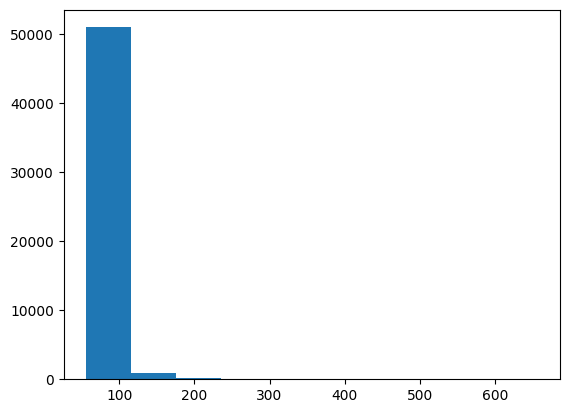

In [3]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens)

In [7]:
len([l for l in lens if l > 128])

634